# **Guia Rápido** 

___


Este capítulo é um guia rápido de operações em `Python` manipular de forma simples Séries Temporais. Empregue este capítulo apenas como um ***guia de consulta rápida***. Nele você vai encontrar um resumo de:

* Como manipular dados de datas e tempo com `Python`
* Como empregar Séries Temporais com o `Pandas`
* E transformações de dados importantes sobre Séries Temporais que serão empregadas e detalhadas nos capítulos seguintes.

Como um *guia rápido* você não precisa ler este capítulo completamente e a maior parte dos conceitos envolvidos serão retomados nos capítulos seguintes. A rigor o capítulo poderia estar até mesmo no final do livro. Mas recomendamos que você faça uma leitura diagonal e rápida apenas para se familiarizar com os comandos.  Nos próximos capítulos, quando surgirem, você entenderá melhor o uso dessas operações e certamente será útil você voltar neste *guia rápido* quando precisar dessas operações.  Por esse motivo, optamos deixá-lo logo no início como um pequeno *mapa* para orientá-lo, e introduzimos as Séries Temporais somente a partir do próximo capítulo, onde de fato, vai começar sua jornada pelas Séries Temporais.

> **Introduzimos as Séries Temporais somente a partir do próximo capítulo, onde de fato, vai começar sua jornada nas Séries Temporais.**

Você encontra esses comandos também no índice remissivo ao final do livro.

---





## Funções deste Livro
### `tspplot()`, `tspdisplay()`

Ao longo do livro você pode encontrar algumas funções `Python` criadas especificamente para este livro. Você pode identificar essas funções pelo nome pois todas iniciam por `tsp` (**t**ime **s**eries **p**ython). A única finalidade dessas funções é proporcionar uma alternativa mais econômica no texto (evitando várias linhas de código) e você poderá empregar igualmente as funções nativas do `Python` em substituição às funções desse livro sempre que desejar. Assim, quando usamos `tspplot()` ou  `tspdisplay()`, você pode empregar igualmente as funções `plot()` ou  `display()`. Tirando a economia de opções e aspectos de formatação empregados para edição do livro, os comandos têm o mesmo propósito e resultado.

In [ ]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [ ]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [ ]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

Outras funções `tsp` que acompanham este livro são apresentadas mais adiante.

## Trabalhando com Datas no Python
### `datetime`, `strftime`, `strptime`, `pd.to_datetime`

Ao trabalhar com séries temporais você pode se deparar com a difícil tarefa de manipular informações de datas e horários. É frequente você obter dados como esses no formato de caracteres. Entretanto, a maior parte das operações sobre datas e horários, como obter o dia da semana, a quantidade de dias corridos entre duas datas, o nome do mês ou a data e hora corrente, só são possíveis empregando-se formatos internos de data e hora do Python, que encontram-se no módulo datetime.

In [ ]:
from datetime import date, time, datetime

print( date(year=2023, month=1, day=31) )
# o mesmo que: print( date(2023, 1, 31) )
print( time(hour=17, minute=29, second=45) )
# o mesmo que: print( time(17, 29, 45) )
print( datetime(year=2023, month=1, day=31, hour=17, minute=29, second=45) )
# o mesmo que: print( datetime(2023, 1, 31, 17, 29, 45) )
print( datetime.now() )


2023-01-31
17:29:45
2023-01-31 17:29:45
2023-02-21 22:15:22.516708


### Strings para Datas e Datas para Strings

Assim, uma tarefa comum, é você transformar dados do formato `string` para `datetime`, ou do formato `datetime` para `strings`. 

In [ ]:
from datetime import datetime

date_string = "01-31-2023 17:29:45"; format_string = "%m-%d-%Y %H:%M:%S"
print( datetime.strptime(date_string, format_string) )

date_string = "01-31-23"; format_string = "%m-%d-%y"
print( datetime.strptime(date_string, format_string) )

date_string = "2023-01-31"; format_string = "%Y-%m-%d"
print( datetime.strptime(date_string, format_string) )


2023-01-31 17:29:45
2023-01-31 00:00:00
2023-01-31 00:00:00


In [ ]:
from datetime import datetime

date_string = "01-31-2023 17:29:45" 
format_string = "%m-%d-%Y %H:%M:%S"
my_date = datetime.strptime(date_string, format_string)  

print( datetime.strftime(my_date, "%Y-%m-%d") )
print( my_date.strftime ( '%A' ) )

print( datetime.strftime(datetime.now(), "Dia corrente: %Y-%m-%d") )
print( datetime.now().strftime ( '%A , %b' ) )

2023-01-31
Tuesday
Dia corrente: 2023-02-21
Tuesday , Feb


Existem muitas opções para se trabalhar essas transformações, mas por hora essas são suficientes e você pode consultar https://docs.python.org/3/library/datetime.html para detalhes dessas funções no `Python 3` e todos os formatos disponíveis das funções `strftime` e `strptime`. 

### Aritmética com datas 

Uma operação comum e difícil de realizar sem funções específicas para isso é a aritmética de datas (e tempo) como, por exemplo, somar um dia a uma data ou ainda algumas horas. Essas operações podem ser feitas com a classe  `timedelta`. 

In [ ]:
from datetime import datetime, timedelta

now = datetime.now()
more_1d = timedelta(days=+1)
less_7d_12h = timedelta(days=-7, hours=-12)

after = now + more_1d
before = now - less_7d_12h

print('\n', before, '\n', now, '\n', after)


 2023-03-01 10:15:22.563023 
 2023-02-21 22:15:22.563023 
 2023-02-22 22:15:22.563023


E operações de diferença de datas retornam um objeto `timedelta`.

In [ ]:
my_birthday = datetime.strptime('1964-05-26', "%Y-%m-%d")

print( now - my_birthday )
print( (now - my_birthday).days , ', Oh! How many days!!!')


21455 days, 22:15:22.563023
21455 , Oh! How many days!!!


A função `timedelta` entretanto só opera com intervalos de dias. Para intervalos de meses ou anos você pode buscar informações do pacote `datautils` ou ainda outras bibliotecas de operações com datas.

### Datetime no Pandas

Dados `datetime` no `Pandas` são armazenados no formato `datetime64[ns]` (um formato de datas do `NumPy`), o que permite acessar uma série de funções para se obter informações sobre datas e variáveis de tempo. 

In [ ]:
import pandas as pd

now = datetime.now()
days = []
for i in range(10):
  days.append( now + timedelta(days=i) )

df = pd.DataFrame({ 'data': days })
df.head()

,data
0,2023-02-21 22:15:22.595268
1,2023-02-22 22:15:22.595268
2,2023-02-23 22:15:22.595268
3,2023-02-24 22:15:22.595268
4,2023-02-25 22:15:22.595268


In [ ]:
df.dtypes

data    datetime64[ns]
dtype: object

In [ ]:
df['year'] = df.data.dt.year 
df['month'] = df.data.dt.month
df['day'] = df.data.dt.day
df['hour'] = df.data.dt.hour
df['week'] = df.data.dt.weekday # 0 = monday ou segunda-feira

df.head()

,data,year,month,day,hour,week
0,2023-02-21 22:15:22.595268,2023,2,21,22,1
1,2023-02-22 22:15:22.595268,2023,2,22,22,2
2,2023-02-23 22:15:22.595268,2023,2,23,22,3
3,2023-02-24 22:15:22.595268,2023,2,24,22,4
4,2023-02-25 22:15:22.595268,2023,2,25,22,5


Ao acessar uma planilha ou arquivo de dados com o `Pandas` é comum você ter essas datas  no formato de `strings`. Uma função útil do `Pandas` para converter essas datas  é a função `to_datetime`. 

In [ ]:
df['data_string'] = df['year'].astype('str') + '/' + df['month'].astype('str') + '/' + df['day'].astype('str')

df[['data','data_string']].head()

,data,data_string
0,2023-02-21 22:15:22.595268,2023/2/21
1,2023-02-22 22:15:22.595268,2023/2/22
2,2023-02-23 22:15:22.595268,2023/2/23
3,2023-02-24 22:15:22.595268,2023/2/24
4,2023-02-25 22:15:22.595268,2023/2/25


In [ ]:
df['data_from_string'] = pd.to_datetime(df['data_string'])
# o mesmo que:
# df['data_from_string'] = pd.to_datetime(df['data_string'],format='%Y/%m/%d')

df[['data','data_string','data_from_string']].head()

,data,data_string,data_from_string
0,2023-02-21 22:15:22.595268,2023/2/21,2023-02-21
1,2023-02-22 22:15:22.595268,2023/2/22,2023-02-22
2,2023-02-23 22:15:22.595268,2023/2/23,2023-02-23
3,2023-02-24 22:15:22.595268,2023/2/24,2023-02-24
4,2023-02-25 22:15:22.595268,2023/2/25,2023-02-25


In [ ]:
df.dtypes

data                datetime64[ns]
year                         int64
month                        int64
day                          int64
hour                         int64
week                         int64
data_string                 object
data_from_string    datetime64[ns]
dtype: object

A função `to_datetime` transforma os dados de datas em caracteres para o formato `datetime64[ns]` do `Pandas`. A função pode automaticamente inferir o formato de entrada ou você pode informar o formato explicitamente. 

Por último, o emprego adequado de Séries Temporais no `Pandas` emprega as datas da Série Temporal como índices do `DataFrame` (no lugar de uma coluna qualquer). Para isso você pode *setar* o índice do `DataFrame` a partir de um atributo ou coluna que contenha as datas da Série Temporal. 

In [ ]:
df = df.set_index('data')
df.head()

,year,month,day,hour,week,data_string,data_from_string
data,,,,,,,
2023-02-21 22:15:22.595268,2023,2,21,22,1,2023/2/21,2023-02-21
2023-02-22 22:15:22.595268,2023,2,22,22,2,2023/2/22,2023-02-22
2023-02-23 22:15:22.595268,2023,2,23,22,3,2023/2/23,2023-02-23
2023-02-24 22:15:22.595268,2023,2,24,22,4,2023/2/24,2023-02-24
2023-02-25 22:15:22.595268,2023,2,25,22,5,2023/2/25,2023-02-25


In [ ]:
df = df.reset_index()

### Validando o formato de Datas

Muitas vezes ao trabalhar com séries de temporais você pode se deparar com a necessidade de validar as datas que você encontra nos seus dados. Podem surgir datas inválidas e erros e é necessário identificar e tratar esses dados. A forma mais correta, comum e eficiente de se fazer isso é empregando-se expressões regulares. Para quem não está familiarizado com expressões regulares, entretanto, esse pode ser um caminho bastante difícil. Embora não seja a forma recomendável indicamos aqui uma forma útil de validar datas empregando as funções `datetime` ou `to_datetime` do `Pandas` e que pode ser empregada por você para pequenos problemas. 



In [ ]:
df['data_string'] = df['year'].astype('str') + '/' + df['month'].astype('str') + '/' + ( df['day'] + 7 ).astype('str')

df[['data_string']].head()

,data_string
0,2023/2/28
1,2023/2/29
2,2023/2/30
3,2023/2/31
4,2023/2/32


In [ ]:
for day in df['data_string']:
  try:
    print( day, ' converted to: ', pd.to_datetime(day) )
  except:
    print( day, ' is a invalid date' )

2023/2/28  converted to:  2023-02-28 00:00:00
2023/2/29  is a invalid date
2023/2/30  is a invalid date
2023/2/31  is a invalid date
2023/2/32  is a invalid date
2023/2/33  is a invalid date
2023/2/34  is a invalid date
2023/2/35  is a invalid date
2023/3/8  converted to:  2023-03-08 00:00:00
2023/3/9  converted to:  2023-03-09 00:00:00


## Aquisição dos dados
### `DataFrame`, `pd.read_csv()`

Uma série temporal é um conjunto de observações no tempo. Essas observações estão geralmente armazenadas em tabelas ou bancos de dados. Uma forma simples para acessar essas tabelas é empregar o `Pandas` que é uma biblioteca de manipulação de dados em `Python`. O `Pandas` permite obter dados em vários formatos de planilhas e bancos de dados. Aqui, na maior parte dos casos vamos trabalhar com planilhas em formato `.csv`. Esses dados são trazidos no formato de um `DataFrame`.



In [ ]:
#@markdown
%%capture
!pip install yfinance
!pip install yahoofinancials

In [ ]:
#@markdown
from yahoofinancials import YahooFinancials

stock_name = 'EMBR3.SA'

yahoo_financials = YahooFinancials(stock_name)
data=yahoo_financials.get_historical_price_data("2000-01-01", "2022-08-31", "daily")

df = pd.DataFrame(data[stock_name]['prices'])

df.to_csv('embr3.csv',index=None)


In [ ]:
import pandas as pd

df = pd.read_csv('/content/embr3.csv')

display(df.head())

,date,high,low,open,close,volume,adjclose,formatted_date
0,946900800,7.758318,7.005253,7.758318,7.162872,1121444.0,6.064206,2000-01-03
1,946987200,6.830122,6.304728,6.830122,6.304728,1432068.0,5.337687,2000-01-04
2,947073600,6.593695,6.217162,6.453590,6.541155,1100888.0,5.537850,2000-01-05
3,947160000,6.479859,6.304728,6.479859,6.330998,523036.0,5.359929,2000-01-06
4,947246400,6.567425,6.348511,6.558669,6.523642,480782.0,5.523024,2000-01-07


Aqui nossa série de dados são valores diários das ações da empresa Embraer (EMBR3.SA).

## Índices
### `df.index`, `tspdisplay()`

Como você pôde ver no `display` anterior, cada observação tem um número sequencial $0, 1, 2, ...$ . No `Pandas` esse valor é o *índice* dos registros da tabela. No caso de Séries Temporais, entretanto, é mais útil empregarmos a série de tempo como índice dos dados. Isso pode ser feito de diversas formas, como empregar um campo de data existente da tabela.

In [ ]:
df.index = pd.to_datetime(df['formatted_date'])
tspdisplay('df')

,date,high,low,open,close,volume,adjclose,formatted_date
formatted_date,,,,,,,,
2000-01-03,946900800,7.758318,7.005253,7.758318,7.162872,1121444.0,6.064206,2000-01-03
2000-01-04,946987200,6.830122,6.304728,6.830122,6.304728,1432068.0,5.337687,2000-01-04
2000-01-05,947073600,6.593695,6.217162,6.453590,6.541155,1100888.0,5.537850,2000-01-05
2000-01-06,947160000,6.479859,6.304728,6.479859,6.330998,523036.0,5.359929,2000-01-06
2000-01-07,947246400,6.567425,6.348511,6.558669,6.523642,480782.0,5.523024,2000-01-07


Note que o campo precisará estar em um formato `datetime` (e não como uma `string`). Note também que empregamos aqui a função `tspdisplay('df')` - veja o `'df'` entre aspas - em lugar do `display(df)` anterior. Você pode substituir a função `tspdisplay('df')` pela função display do `Python` sempre que quiser.

## Seleção dos dados
### `df[ <seleção de linhas> ][ <lista de colunas> ]`

Na maior parte do tempo estaremos interessados em uma única Série de dados. Selecionar da tabela somente a Série de dados de interesse e eliminar os demais torna as operações bastante mais simples, desobrigando a referência ao atributo do valor a todo momento. Além disso, muitas vezes você pode querer selecionar apenas um intervalo de tempo da Série. No primeiro caso, você precisa fazer uma seleção de colunas do `DataFrame`. No segundo, uma seleção de linhas.

In [ ]:
df = df[df.index.year >= 2015][['close']]
df.index.name = ''

tspdisplay('df')

,close
,
2015-01-02,24.850000
2015-01-05,24.299999
2015-01-06,23.860001
2015-01-07,23.680000
2015-01-08,23.000000


Nosso dataframe agora é constituído por um índice no formato `datetime` e um campo de valores.

> **Um DataFrame com um índice no formato `datetime` e um único campo de valores.** Este será o formato que normalmente adotaremos para a maior parte das Séries de dados neste livro. Várias operações ficam bastante mais simples neste formato.


A seguir, selecionamos somente os dados de fechamento a partir de 2015 da Série original. Também retiramos o nome do índice, mas isso é opcional.

Seleções podem ser feitas também indicando valores ou range de valores do índice diretamente como chaves de consulta.

In [ ]:
index = pd.DatetimeIndex(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01', '2025-01-01'])

df_ex = pd.DataFrame({'value':[0,1,2,3,4]}, index=index)

tspdisplay('df_ex', 'df_ex["2023":"2025"]', 'df_ex.loc["2023"]') # .loc localiza um valor do índice (experimente sem o .loc)
# aqui o mesmo que 
# display(df_ex, df_ex["2023":"2025"], df_ex.loc["2023"])

,value
2021-01-01,0
2022-01-01,1
2023-01-01,2
2024-01-01,3
2025-01-01,4
,value
2023-01-01,2
2024-01-01,3
2025-01-01,4
,value


## Gráficos 
### `plot()` `tspplot()` 

Em geral vamos empregar a biblioteca gráfica `matplotlib` para produzir visualizações das Séries de dados. A visualização tem um papel importante na análise de Séries Temporais e vamos recorrer a ela muitas vezes. 

Os comandos a seguir permitem exibir nossa Série exemplo com as cotações da EMBR3.SA. 

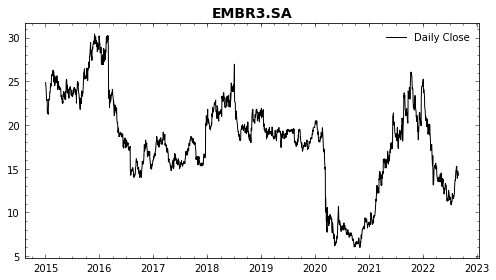

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(df,label='Daily Close')
ax.set_title('EMBR3.SA')
plt.legend()

plt.tight_layout()
plt.show()

Se você já é usuário de `Python` talvez tenha notado que não precisamos indicar os valores `x` e `y` do gráfico. Como nosso `DataFrame` `df` tem um índice em formato de datas, o `matplotlib` entende automaticamente tratar-se de uma série temporal. 

> **Em um DataFrame com um índice `datetime` o `matplotlib` entende tratar-se de uma série temporal e emprega automaticamente o índice como eixo `x` do gráfico e os valores da Série no eixo `y`.**



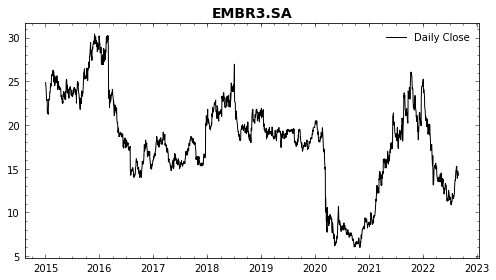

In [ ]:
tspplot(ts=df,title='EMBR3.SA',label='Daily Close')

Empregamos a função customizada `tspplot()` para tornar o código mais simples, mas você pode empregar igualmente a função `plot()`. 

## Reamostragem
### `.resample()`

Outra transformação útil e que só faz sentido para Séries Temporais é reamostrar os dados com uma frequencia diferente da original. Por exemplo, podemos reamostar nossa Série de dados dários da EMBR3.SA, para valores mensais da Série. 

,close
,
2015-01-31,22.755238
2015-02-28,25.252778
2015-03-31,24.970909
2015-04-30,23.600000
2015-05-31,23.789000


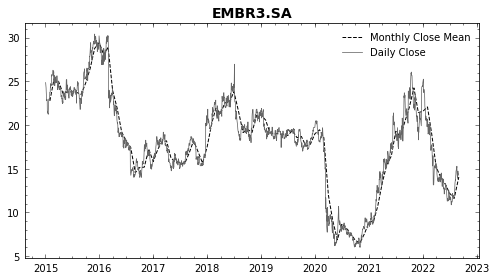

In [ ]:
df_monthly = df.resample('M').mean()

fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',lw=1,ax=ax)
tspplot(df,title='EMBR3.SA',label='Daily Close',ax=ax,alpha=0.1,lw=0.75)

tspdisplay('df_monthly')

Igualmente podemos reamostrar para valores semanais, trimestrais ou anuais, assim como séries com frequência de minutos podem ser reamostradas em horas ou dias. Aqui empregamos o valor médio do mês para a reamostragem, mas também podemos empregar o máximo, o mínimo ou a mediana dos valores.

## Médias Móveis
### `rolling(n)`
A ideia de médias móveis é obter uma *suavização* dos dados empregando um valor que é a média de uma *janela móvel* ao longo do tempo. Você aprenderá essa técnica em detalhe nos capítulos deste livro. Por hora, basta você entender, por exemplo, que se você tem dados diários, você pode criar uma média móvel de 7 dias em que o primeiro valor é a média dos 7 primeiros dias, $avg[1:7]$, o próximo valor é média do segundo dia até o 8o dia, $avg[2:8]$, e assim sucessivamente, $avg[3:9]$, $avg[4:10]$, sempre em uma *janela* de tempo de 7 dias.

Veja a seguir a série EMBR3.SA com média móvel trimestral e o gráfico com as médias móveis de 3 e 12 meses. 



,close
,
2015-01-31,NaN
2015-02-28,NaN
2015-03-31,24.326308
2015-04-30,24.607896
2015-05-31,24.119970


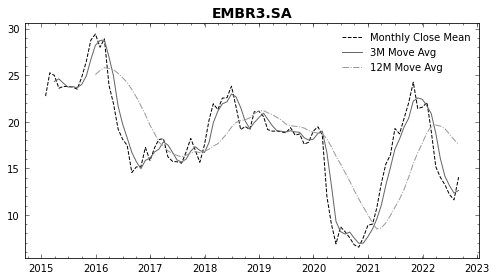

In [ ]:
fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',ax=ax)
tspplot(df_monthly.rolling(3).mean(),title='EMBR3.SA',label='3M Move Avg',ax=ax,alpha=0.5)
tspplot(df_monthly.rolling(12).mean(),title='EMBR3.SA',label='12M Move Avg',linestyle='dashdot',ax=ax,alpha=0.5)

tspdisplay('df_monthly.rolling(3).mean()')

## Decomposição
### `seasonal_decompose()`, `tspdecompose()`
Um aspecto importante na análise de Séries Temporais é a sua decomposição. Existem 3 componentes principais, a tendência, a sazonalidade e os resíduos. Boa parte do capítulo Introdução às Séries Temporais se dedica a explicar em detalhe essas componentes. Para obtermos essas componentes vamos empregar a biblioteca `statsmodel`. Essa biblioteca traz uma série de funções estatísticas e modelos de Séries Temporais, e vamos empregá-la bastante nos capítulos seguintes.  A função  `seasonal_decompose()` permite facilmente observar as componentes de uma Série. Do mesmo modo que antes, muitas vezes vamos empregar a função customizada `tspdecompose()`.

In [ ]:
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

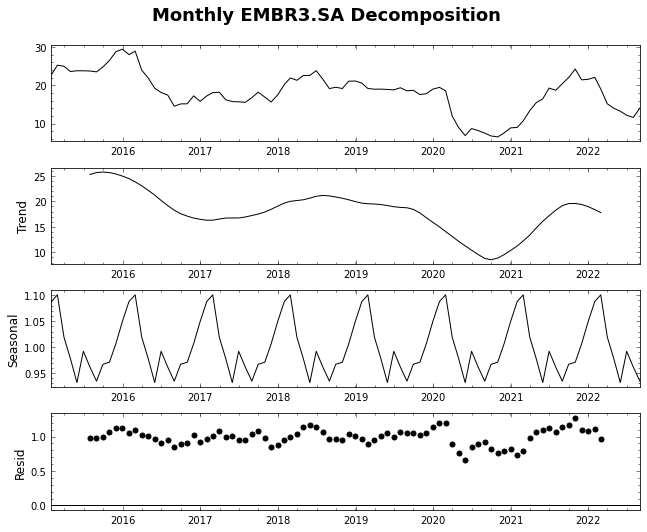

In [ ]:
tspdecompose(df_monthly,title='Monthly EMBR3.SA Decomposition')

## Manipulações de Séries Temporais
### `.diff() .shift() .cumsum()`

Existem algumas manipulações de dados, como o tratamento de dados nulos ou a normalização de valores, que são bastante gerais e aplicadas a vários tipos de dados tabulares. Mas existem manipulações  que são bastante específicas e que só se aplicam para Séries Temporais. Estas são operações que desempenham um papel importante no tratamento de Séries Temporais, como em transformações para retirar a tendência ou um comportamento sazonal de uma Série. Algumas dessas operações são apresentadas a seguir e serão aplicadas nos capítulos seguintes quando efetuarmos essas transformações. 

A operação `.diff()` obtém a diferença entre um valor da série e o valor anterior, enquanto a função `.cumsum()` acumula no valor anterior (operação inversa do `.diff()`). A operação `.shift(n)` produz a *defasagem* da série em $n$ intervalos de tempo.

In [ ]:
df_diff = df.diff()
df_shift = df.shift()

df_diff_copy = df_diff.copy()
df_diff_copy.at[pd.to_datetime('2015-01-02'),'close'] = 24.85
df_cumsum = df_diff_copy.cumsum()

tspdisplay('df','df_diff','df_shift','df_cumsum')

,close
,
2015-01-02,24.850000
2015-01-05,24.299999
2015-01-06,23.860001
2015-01-07,23.680000
2015-01-08,23.000000
,close
,
2015-01-02,NaN
2015-01-05,-0.550001


Essas operações serão bastante úteis nos demais capítulos. Por hora, você pode entender o uso dessas transformações quando, por exemplo, estamos interessados não no valor das ações da EMBR3.SA, mas nas diferenças das cotações diárias, isto é, se a o valor da ação subiu ou desceu com relação ao dia anterior. Isto é exatamente a função `diff()`.

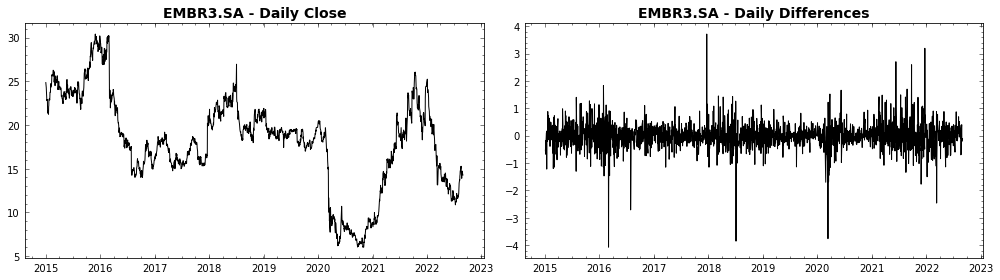

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

tspplot(df,title='EMBR3.SA - Daily Close',ax=ax[0])
tspplot(df.diff(),title='EMBR3.SA - Daily Differences',ax=ax[1])


# Para Saber Mais

Para uma introdução ao uso dos pacotes `Pandas` e `Matplotlib` acesse: 

* Jake VanderPlas. **Python Data Science Handbook** O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. 

Há também na seção *Working with Time Series* que pode ser uma introdução alternativa à manipulação de dados de Séries Temporais e o uso de datas com `Python`.

<br>

Acesse também a documentação oficial das bibliotecas empregadas. Lá você vai poder encontrar uma série de tutoriais, exemplos e a documentação completa dos pacotes.

* `Pandas`, https://pandas.pydata.org/ 

* `Matplotlib`, https://matplotlib.org 

* `Statsmodel` https://statsmodels.org


